In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
DATA_PATH = "../data/processed/final.csv"
df = pd.read_csv(DATA_PATH)

In [6]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)
print("\nHead:\n", df.head())

Shape: (383, 13)

Columns:
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Data Types:
 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

Head:
     Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  

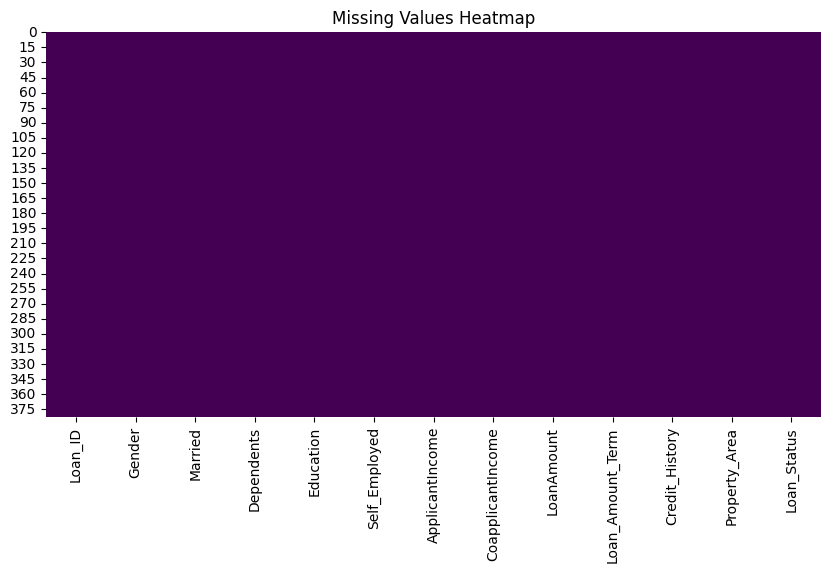

In [7]:
# 4️⃣ Missing Values Heatmap
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.show()


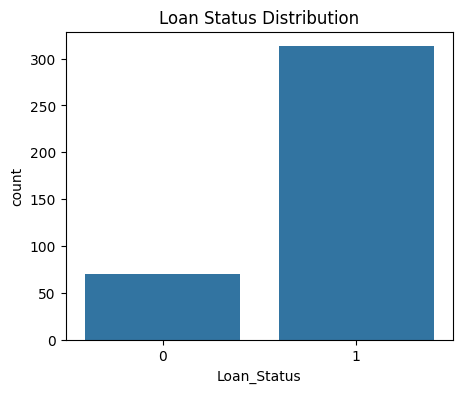


Target Value Counts:
 Loan_Status
1    313
0     70
Name: count, dtype: int64


In [8]:
# 5️⃣ Target Distribution
plt.figure(figsize=(5,4))
sns.countplot(x="Loan_Status", data=df)
plt.title("Loan Status Distribution")
plt.show()
print("\nTarget Value Counts:\n", df["Loan_Status"].value_counts())

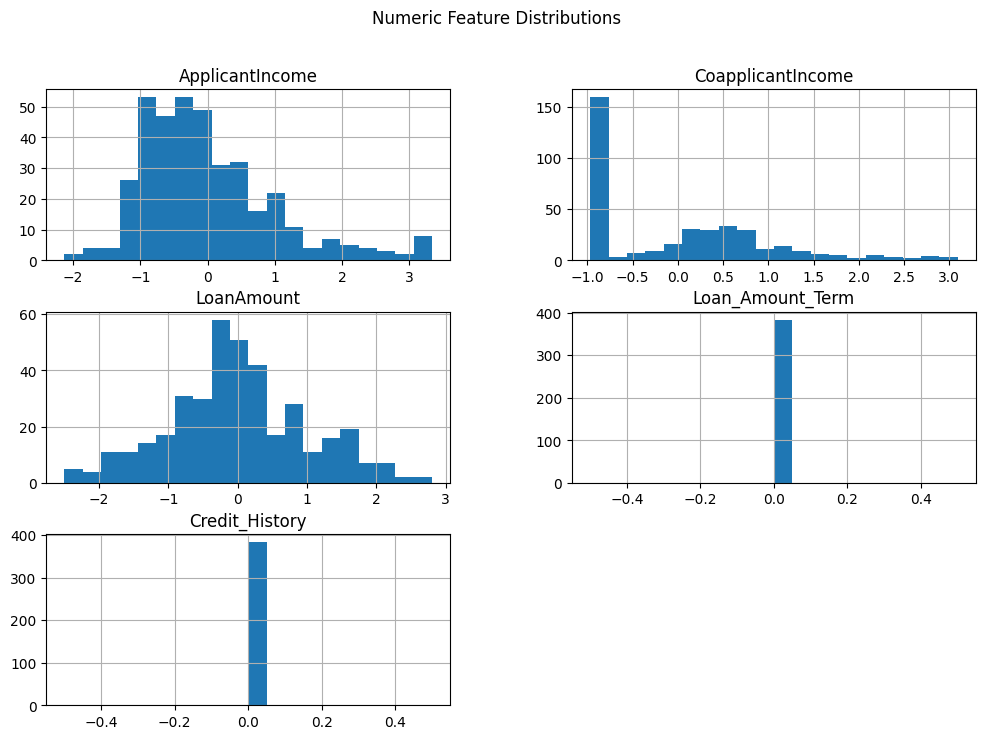

In [11]:
# 6️⃣ Feature Distributions
numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns.tolist()
numeric_cols.remove("Loan_Status")  # Exclude target

df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.suptitle("Numeric Feature Distributions")
plt.show()

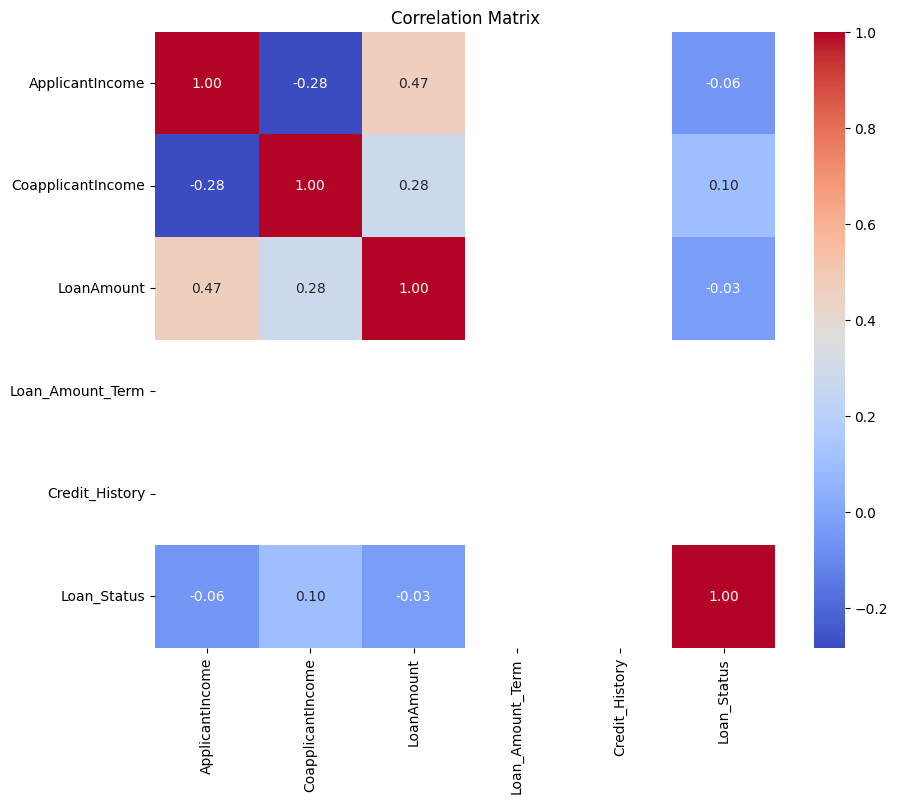

In [13]:
# 7️⃣ Correlation Matrix (numeric only)
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
plt.figure(figsize=(10,8))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [14]:
# 8️⃣ Insights Summary
with open("../DATA-REPORT.md", "w") as f:
    f.write("# EDA Report\n\n")
    f.write("## Shape and Columns\n")
    f.write(f"{df.shape}\n\n")
    f.write(f"{df.columns.tolist()}\n\n")
    f.write("## Missing Values\n")
    f.write(f"{df.isnull().sum().to_dict()}\n\n")
    f.write("## Target Distribution\n")
    f.write(f"{df['Loan_Status'].value_counts().to_dict()}\n\n")
    f.write("## Correlation Matrix\n")
    f.write(f"{corr.to_dict()}\n\n")
